In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import random
import seaborn as sns


In [2]:
#  Load data
dataset  = pd.read_csv('2008-01-02-LEH.N-bbo.csv', index_col = 0)
dataset.index = pd.DatetimeIndex(dataset.index)

difference_set = np.log(dataset).diff()
difference_set.head(10)

,bid-price,bid-volume,ask-price,ask-volume
time,,,,
2008-01-02 14:31:59.900999680,NaN,NaN,NaN,NaN
2008-01-02 14:31:59.900999680,0.000000,0.000000,0.0,-0.089612
2008-01-02 14:31:59.900999680,0.000000,0.875469,0.0,0.000000
2008-01-02 14:31:59.900999680,0.000000,0.000000,0.0,-0.015748
2008-01-02 14:31:59.900999680,0.000000,-0.875469,0.0,0.000000
2008-01-02 14:31:59.948000000,-0.000616,-0.916291,0.0,0.000000
2008-01-02 14:31:59.948000000,0.000770,-0.693147,0.0,0.000000
2008-01-02 14:31:59.948000000,-0.000770,0.693147,0.0,0.000000
2008-01-02 14:31:59.968999936,-0.000771,2.708050,0.0,0.000000


In [3]:
dataset.head(10)

,bid-price,bid-volume,ask-price,ask-volume
time,,,,
2008-01-02 14:31:59.900999680,64.95,5,65.0,70
2008-01-02 14:31:59.900999680,64.95,5,65.0,64
2008-01-02 14:31:59.900999680,64.95,12,65.0,64
2008-01-02 14:31:59.900999680,64.95,12,65.0,63
2008-01-02 14:31:59.900999680,64.95,5,65.0,63
2008-01-02 14:31:59.948000000,64.91,2,65.0,63
2008-01-02 14:31:59.948000000,64.96,1,65.0,63
2008-01-02 14:31:59.948000000,64.91,2,65.0,63
2008-01-02 14:31:59.968999936,64.86,30,65.0,63


In [4]:
dataset

,bid-price,bid-volume,ask-price,ask-volume
time,,,,
2008-01-02 14:31:59.900999680,64.95,5,65.00,70
2008-01-02 14:31:59.900999680,64.95,5,65.00,64
2008-01-02 14:31:59.900999680,64.95,12,65.00,64
2008-01-02 14:31:59.900999680,64.95,12,65.00,63
2008-01-02 14:31:59.900999680,64.95,5,65.00,63
...,...,...,...,...
2008-01-02 20:59:59.602999552,62.23,13,62.24,5
2008-01-02 20:59:59.668000000,62.23,33,62.24,5
2008-01-02 21:00:00.089000192,62.23,23,62.24,5


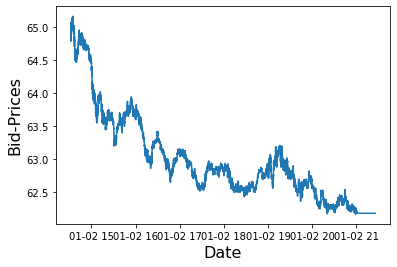

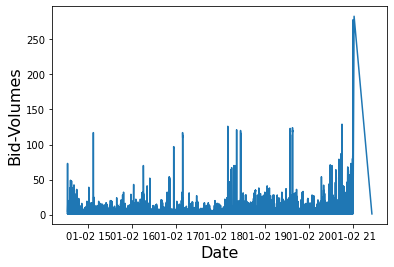

In [5]:
plt.figure(1)
plt.plot(dataset['bid-price'])
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Bid-Prices', fontsize = 16)
plt.show()

plt.figure(2)
plt.plot(dataset['bid-volume'])
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Bid-Volumes', fontsize = 16)
plt.show()

In [6]:
price_b_var = difference_set['bid-price']
volume_b_var = difference_set['bid-volume']

In [7]:
price_b_var =price_b_var[(price_b_var !=0)]
volume_b_var =volume_b_var[volume_b_var !=0]

price_b_var = price_b_var.iloc[1:]
volume_b_var = volume_b_var.iloc[1:]

In [8]:
price_b_var  = price_b_var[~price_b_var.index.duplicated(keep = 'last')]
volume_b_var  = volume_b_var[~volume_b_var.index.duplicated(keep = 'last')]

In [9]:
data = pd.concat([price_b_var, volume_b_var], axis = 1)

In [10]:
data = data.ffill(axis = 0)
data

,bid-price,bid-volume
time,,
2008-01-02 14:31:59.900999680,NaN,-0.875469
2008-01-02 14:31:59.948000000,-0.000770,0.693147
2008-01-02 14:31:59.968999936,-0.000771,2.708050
2008-01-02 14:32:00.036000000,-0.000154,-0.836248
2008-01-02 14:32:00.086000384,0.000771,-1.178655
...,...,...
2008-01-02 20:59:59.602999552,0.000643,0.167054
2008-01-02 20:59:59.668000000,0.000643,0.931558
2008-01-02 21:00:00.089000192,0.000643,-0.361013


In [11]:
data_price = data.loc[price_b_var.index].iloc[1:]
data_price['Return'] = data_price['bid-price']
data_price['Bid Volume Variation'] = data_price['bid-volume']
price_b_var[~price_b_var.index.duplicated(keep = 'last')]
data_price['Bid Volume'] = dataset['bid-volume'][~dataset.index.duplicated(keep = 'last')]
data_price['Ask Price'] = dataset['ask-price'][~dataset.index.duplicated(keep = 'last')]
data_price['Ask Volume'] = dataset['ask-volume'][~dataset.index.duplicated(keep = 'last')]
data_price['Bid Price'] = dataset['bid-price'][~dataset.index.duplicated(keep = 'last')]
del data_price['bid-price']
del data_price['bid-volume']
del data_price['Return']

df = data_price

del df['Bid Volume']
df

,Bid Volume Variation,Ask Price,Ask Volume,Bid Price
time,,,,
2008-01-02 14:31:59.968999936,2.708050,65.00,63,64.86
2008-01-02 14:32:00.036000000,-0.836248,65.00,60,64.85
2008-01-02 14:32:00.086000384,-1.178655,65.00,60,64.90
2008-01-02 14:32:00.100000256,1.178655,65.00,60,64.85
2008-01-02 14:32:00.734000384,-4.290459,64.95,1,64.80
...,...,...,...,...
2008-01-02 20:59:41.705000192,3.417727,62.21,1,62.19
2008-01-02 20:59:53.475000064,2.275556,62.24,1,62.18
2008-01-02 20:59:55.706000384,-1.938742,62.28,49,62.19


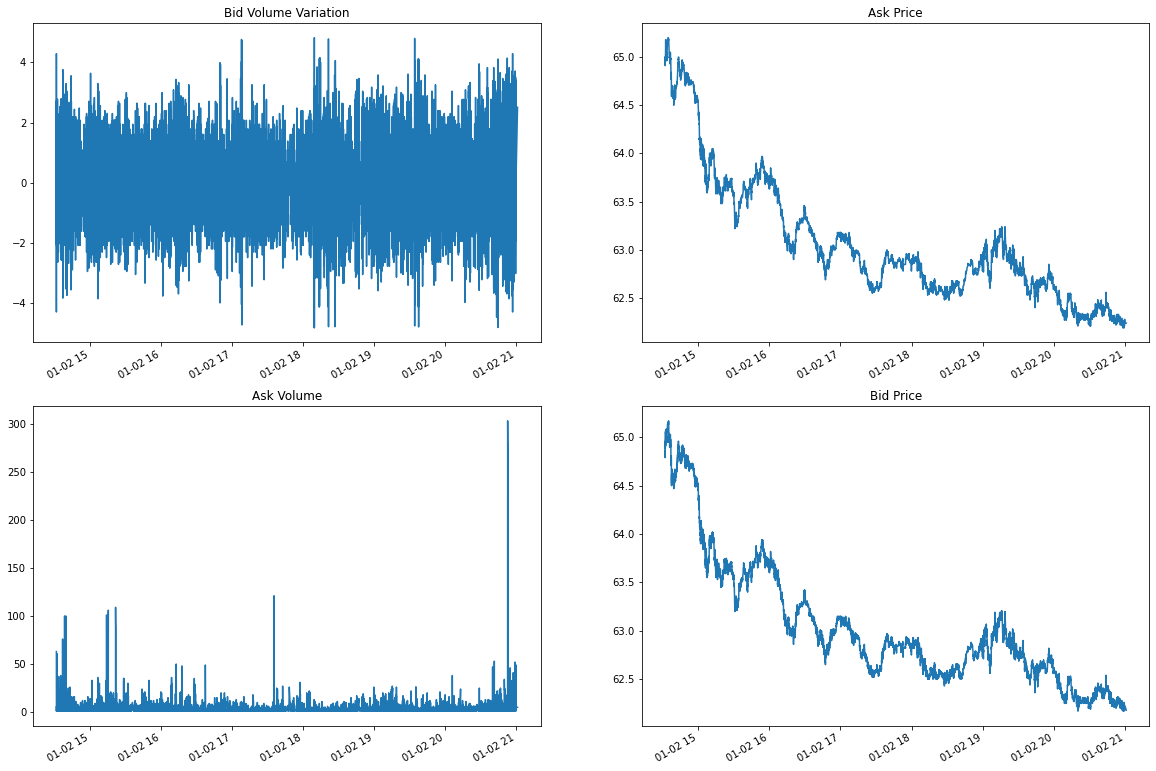

In [12]:
# Plot our dataframe!
columns = df.columns

plt.figure(figsize=(20,30))

for ξ,c in enumerate(columns):
    
    plt.subplot(4,2,ξ+1)
    df[c].plot(ax=plt.gca(), title=c); plt.xlabel(None)

In [ ]:
from tsmoothie.smoother import *
from tsmoothie.bootstrap import BootstrappingWrapper
from tsmoothie.utils_func import create_windows
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *

In [ ]:
# Distinguish the train and test data!

window_shape = 25
time_min = 4

# We take 5 min windown to train our data!
train = df.head(300)
test = df[~df.index.isin(train.index)]



In [ ]:
# Smouth the data we chose for train!

smoother = SpectralSmoother(smooth_fraction=0.2, pad_len=12)
smoother.smooth(train.T)

<tsmoothie.smoother.SpectralSmoother>

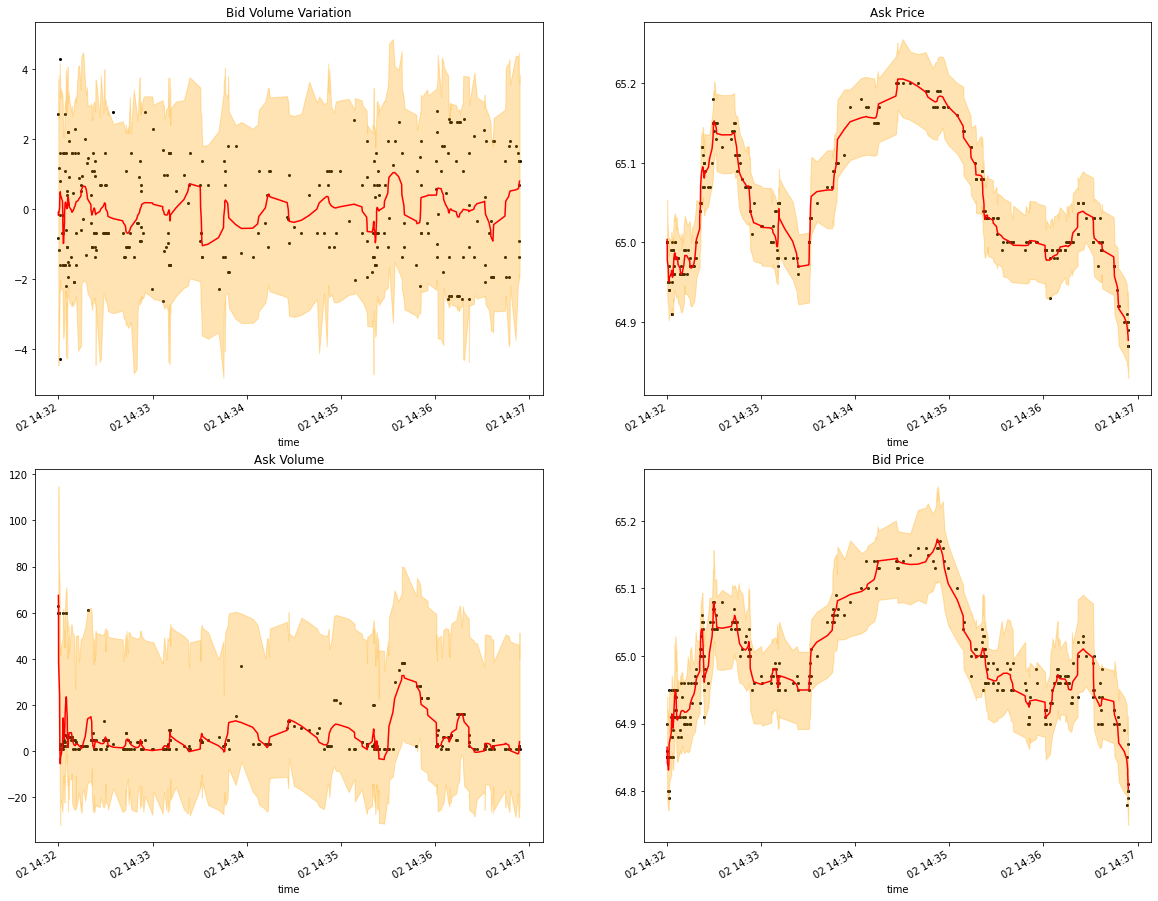

In [ ]:
# Plot boostrap data!

plt.figure(figsize=(20,35))

for i,c in enumerate(columns):
    
    plt.subplot(4,2,i+1)
    
    bts = BootstrappingWrapper(SpectralSmoother(smooth_fraction=0.2, pad_len=12), bootstrap_type='mbb', block_length=24)

    # we chose to take the size of the sample 300
    bts_samples = bts.sample(train[c], n_samples = 300)
    
    pd.Series(smoother.smooth_data[i], index=train.index).plot(c='red')
    plt.scatter(train.index, smoother.data[i], c='black', s=4)
    plt.fill_between(train.index, bts_samples.min(0), bts_samples.max(0), alpha=0.3, color='orange')
    plt.title(c)


# Residual bootstrap is a model-based approach. As the name suggests, the bootstrapping is carried
# out on the residuals obtained as a result of a modeling operation on the raw data.

# With tsmoothie, we combine the block bootstrap sampling procedure with the model base dependency of the residual bootstrap.

# The combination of all the bootstrapped series tends to form confidence intervals.
# Time series bootstrapping is also a valid method to create intervals to evaluate outliers.

In [ ]:
X_test = create_windows(test[columns], window_shape = window_shape, end_id=-time_min)
y_test = create_windows(test[columns], window_shape = time_min, start_id=window_shape)

prev_test = X_test[:,[-1],:]
X_test = X_test - prev_test
y_test = np.squeeze(y_test[...,[-1]], -1)

X_test.shape, y_test.shape

((15020, 25, 4), (15020, 4))

In [ ]:
# BOOSTRAP TRAIN SERIES

bts_samples = []

for i,c in enumerate(columns):
    
    np.random.seed(33)
    bts = BootstrappingWrapper(SpectralSmoother(smooth_fraction=0.18, pad_len=12), bootstrap_type='mbb', block_length=100)
    bts_samples.append(bts.sample(train[c], n_samples=50))
    
bts_samples = np.stack(bts_samples, axis=-1)
bts_samples.shape

(50, 300, 4)

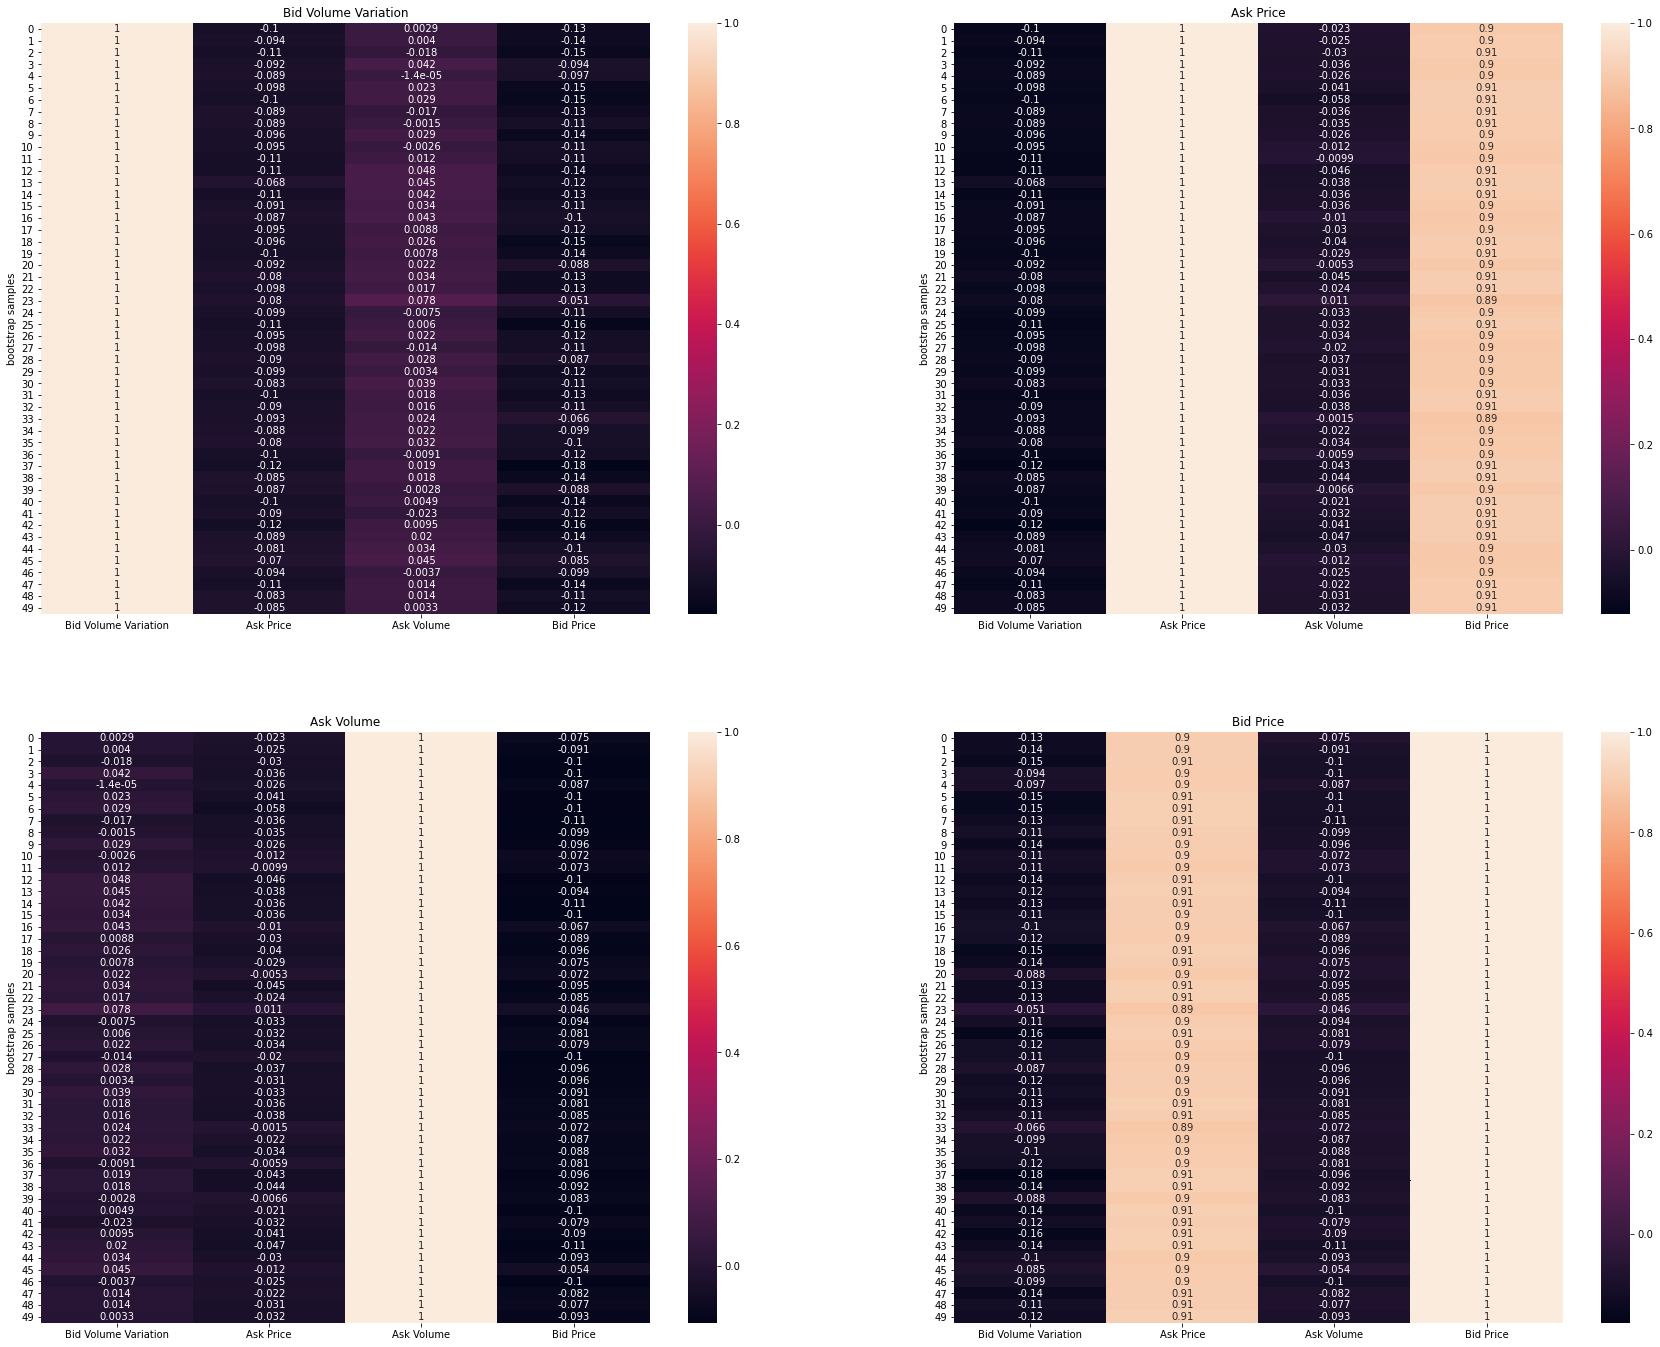

In [ ]:
# CORRELATION BETWEEN SAMPLES

corr_samples = np.stack([np.corrcoef(n.T) for n in bts_samples], 0)

plt.figure(figsize=(30,50))

for i,c in enumerate(columns):
    
    plt.subplot(4,2,i+1)
    sns.heatmap(corr_samples[:,i,:], annot=True)
    plt.ylabel('bootstrap samples'); plt.xticks(np.arange(0.5, len(columns)), columns)
    plt.title(c)

In [ ]:
# I would like to mention that I found this library from the internet and I tried to implement it on the prediction
# https://github.com/cerlymarco/keras-hypetune

# CREATE TRAIN/VALIDATION WINDOWS W/ BOOTSTRAP

window_shape = 25

_X = create_windows(train[columns], window_shape=window_shape, end_id=-time_min)
_y = create_windows(train[columns], window_shape=time_min, start_id=window_shape)
_X_train, _X_val, _y_train, _y_val = train_test_split(_X, _y, test_size=window_shape*3, shuffle=False)
X_train, X_val, y_train, y_val = [_X_train], [_X_val], [_y_train], [_y_val]

for i in range(bts_samples.shape[0]):

    _X = create_windows(bts_samples[i], window_shape=window_shape, end_id=-time_min)
    _y = create_windows(bts_samples[i], window_shape=time_min, start_id=window_shape)
    _X_train, _X_val, _y_train, _y_val = train_test_split(_X, _y, test_size=window_shape*3, shuffle=False)
    X_train.append(_X_train)
    y_train.append(_y_train)
    
X_train = np.concatenate(X_train); X_val = np.concatenate(X_val)
y_train = np.concatenate(y_train); y_val = np.concatenate(y_val)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(10047, 25, 4) (10047, 4, 4)
(75, 25, 4) (75, 4, 4)


In [ ]:
# STANDARDIZE TRAIN/VALIDATION WINDOWS

prev_train = X_train[:,[-1],:]
prev_val = X_val[:,[-1],:]

y_train = y_train[...,[-1]] - prev_train[...,[-1]]
X_train = X_train - prev_train

y_val = y_val[...,[-1]] - prev_val[...,[-1]]
X_val = X_val - prev_val

In [ ]:
from kerashypetune import KerasGridSearch

In [ ]:
def get_model(param):
        
    inp = Input((window_shape,len(columns)))
    enc = LSTM(param['lstm_unit'], activation=param['lstm_act'], 
               return_sequences=False)(inp)
    x = RepeatVector(time_min)(enc)
    dec = LSTM(param['lstm_unit'], activation=param['lstm_act'],
               return_sequences=True)(x)
    
    out = TimeDistributed(Dense(1))(dec)
    
    model = Model(inp, out)
    model.compile(Adam(lr=param['lr']), 'mse')
    
    return model

# TRAIN

param_grid = {
    'lstm_unit': [128,64], 
    'lstm_act': ['tanh','relu'],
    'lr': [1e-4,1e-3], 
    'epochs': 100, 
    'batch_size': [16,32,128]
}


# We operate hyperparameter tuning
# Bootstrapping our time series, on the train set, can help our model to view more samples and learn better the dynamics of the underlying system.

# The training process is computed by optimizing the parameters on the validation set with a grid search approach through keras-hypetune.

es = EarlyStopping(patience=10, verbose=1, min_delta=0.001, monitor='val_loss', mode='auto', restore_best_weights=True)
hypermodel = get_model
kgs = KerasGridSearch(hypermodel, param_grid, monitor='val_loss', greater_is_better=False, tuner_verbose=1)
kgs.search(X_train, y_train, validation_data=(X_val, y_val), callbacks=[es])


24 trials detected for ('lstm_unit', 'lstm_act', 'lr', 'epochs', 'batch_size')


c:\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



***** (1/24) *****
Search({'lstm_unit': 128, 'lstm_act': 'relu', 'lr': 0.0001, 'epochs': 100, 'batch_size': 16})
Restoring model weights from the end of the best epoch: 4.
Epoch 14: early stopping
SCORE: 0.00131 at epoch 10

***** (2/24) *****
Search({'lstm_unit': 128, 'lstm_act': 'relu', 'lr': 0.0001, 'epochs': 100, 'batch_size': 32})
Restoring model weights from the end of the best epoch: 6.
Epoch 16: early stopping
SCORE: 0.00135 at epoch 15

***** (3/24) *****
Search({'lstm_unit': 128, 'lstm_act': 'relu', 'lr': 0.0001, 'epochs': 100, 'batch_size': 128})
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
SCORE: 0.00144 at epoch 11

***** (4/24) *****
Search({'lstm_unit': 128, 'lstm_act': 'relu', 'lr': 0.001, 'epochs': 100, 'batch_size': 16})
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
SCORE: 0.00127 at epoch 6

***** (5/24) *****
Search({'lstm_unit': 128, 'lstm_act': 'relu', 'lr': 0.001, 'epochs': 100, 'batch_

470/470 [==============================] - 4s 6ms/step


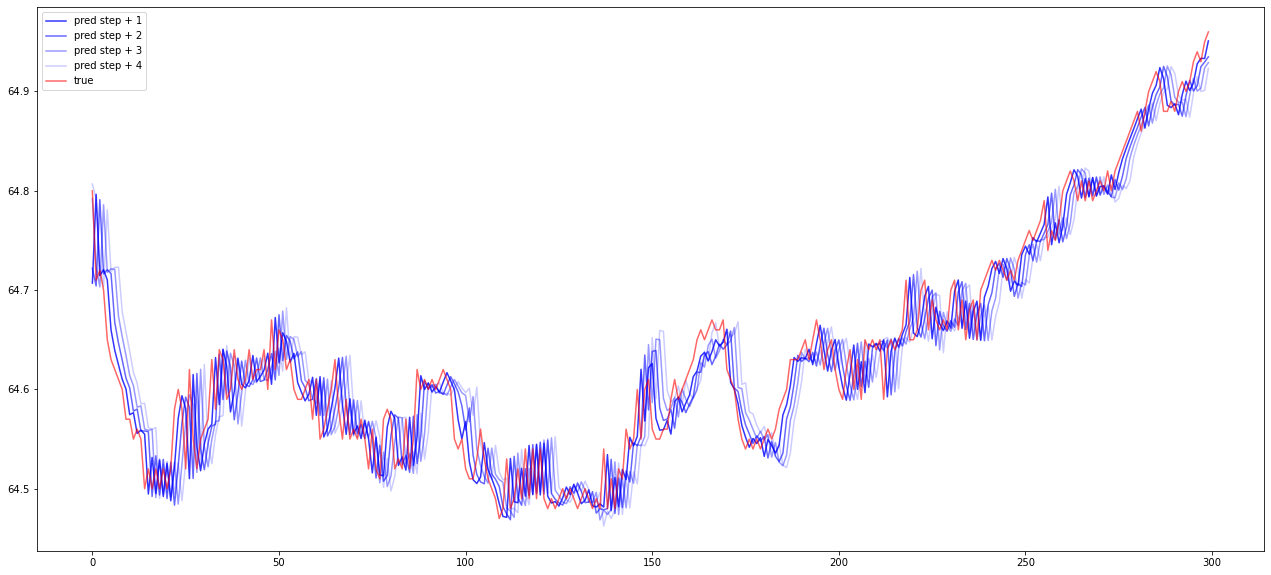

In [ ]:
# PREDICTIONS ON TEST

pred_boot = kgs.best_model.predict(X_test)

pred_boot = np.squeeze(pred_boot + prev_test[...,[-1]], -1)

# PLOT Predictions

plt.figure(figsize=(22,10))

for t_h in range(time_min):
    plt.plot(pred_boot[(time_min-t_h):-(t_h+1),t_h][:300], 
             c='blue', alpha=1-1/(time_min+1)*(t_h+1),
             label=f"pred step + {t_h+1}")

plt.plot(y_test[time_min:,0][:300], 
         c='red', alpha=0.6, label='true')

plt.legend()
plt.show()

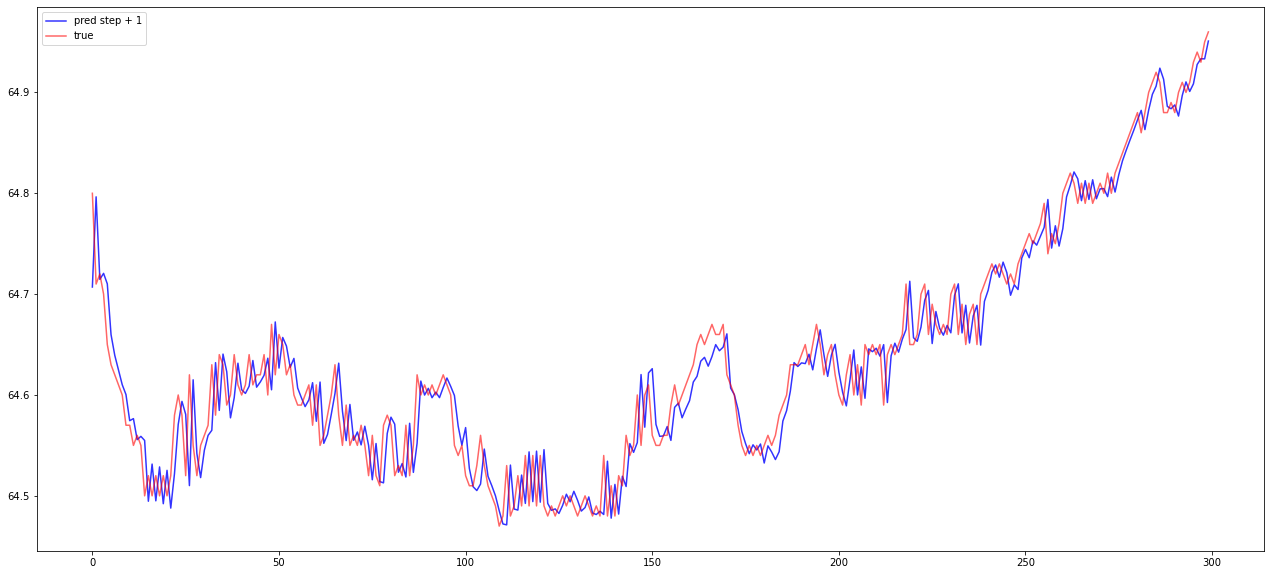

In [ ]:
# PLOT Predictions

plt.figure(figsize=(22,10))

for t_h in range(1):
    plt.plot(pred_boot[(time_min-t_h):-(t_h+1),t_h][:300], 
             c='blue', alpha=1-1/(time_min+1)*(t_h+1),
             label=f"pred step + {t_h+1}")

plt.plot(y_test[time_min:,0][:300], 
         c='red', alpha=0.6, label='true')

plt.legend()
plt.show()

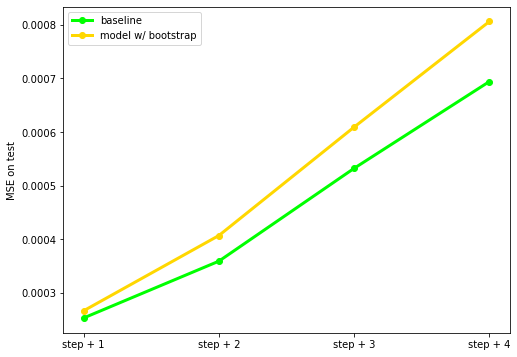

In [ ]:
# PERFORMANCE

mse_model_boot = {}
mse_baseline = {}

for t_h in range(time_min):

    _mse = mse(y_test[1:,t_h], y_test[:-1,0])
    mse_baseline[f"step + {t_h+1}"] = _mse 
    
    _mse = mse(y_test[:,t_h], pred_boot[:,t_h])
    mse_model_boot[f"step + {t_h+1}"] = _mse 


### PLOT
#The baseline is the simple repetition of the last available observation 

plt.figure(figsize=(8,6))

plt.plot(list(mse_baseline.values()), label='baseline', 
         c='lime', linewidth=3, marker='o')

plt.plot(list(mse_model_boot.values()), label='model w/ bootstrap', 
         c='gold', linewidth=3, marker='o')

plt.xticks(range(time_min), mse_baseline.keys())
plt.ylabel('MSE on test'); plt.legend()